<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)

x train shape:  (60000, 28, 28)
y train shape:  (60000,)
x test shape:  (10000, 28, 28)
y test shape:  (10000,)


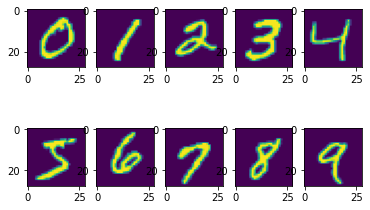

In [3]:
for i in range(10):
  for j in range(60000):
    if y_train[j] == i:
      plt.subplot(2,5,i+1)
      plt.imshow(x_train[j])
      break

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)
print("Max x train ",np.max(x_train))

x train shape:  (60000, 28, 28)
y train shape:  (60000, 10)
x test shape:  (10000, 28, 28)
y test shape:  (10000, 10)
Max x train  1.0


In [10]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               401536    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


938/938 [==============================] - 67s 71ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 2/20
938/938 [==============================] - 67s 71ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 3/20
938/938 [==============================] - 66s 71ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0376 - val_accuracy: 0.9886
Epoch 4/20
938/938 [==============================] - 66s 71ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0418 - val_accuracy: 0.9883
Epoch 5/20
938/938 [==============================] - 67s 71ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 6/20
938/938 [==============================] - 66s 71ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 7/20
938/938 [==============================] - 67s 71ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0359 - val_accuracy: 0.9894
Epo

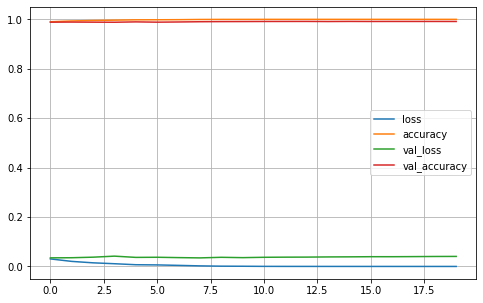

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


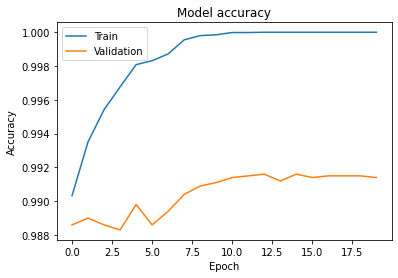

In [13]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=1)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
model_json = model.to_json()
with open('drive/MyDrive/Model/MNIST/mnist.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/MNIST/mnist_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()


array([7])

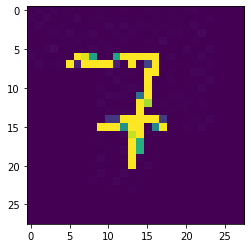

In [24]:
url = 'drive/MyDrive/data_test/mnist/test_img_'+str(9)+'.jpg'
img = plt.imread(url)
plt.imshow(img)
img = img.reshape(1,28,28)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=1)